In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from examples.split_based_on_resting import LoadEpochsP
import os
import mne 

In [2]:
path ="EDF_test/"
folder = os.fsencode(path)
raw = LoadEpochsP(folder, path, 2)

02IT-EDF+.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    5.6s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


Removed notch frequencies (Hz):
     50.00 : 17366 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████|  : 915/915 [01:23<00:00,   10.91it/s]


RANSAC done!



2024-04-17 13:50:34,813 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['F7'], 'bad_by_correlation': ['Fp1'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Fp1', 'F7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


 29%|██▉       |  : 266/915 [00:22<00:53,   12.09it/s]


KeyboardInterrupt: 

In [4]:
rest, med, fam = raw


In [8]:
psds, freqs = mne.time_frequency.psd_array_welch(rest[0].get_data(), 250, fmin=4, fmax=7)
print(psds)

Effective window size : 1.024 (s)


[[[8.89682612e-13 6.20403172e-13 6.94847283e-13]
  [1.03902258e-12 5.70019720e-13 1.11342196e-12]
  [8.94876831e-13 3.63692962e-13 3.88526391e-13]
  [1.67737092e-12 9.73439076e-13 1.37790058e-12]
  [2.01652916e-12 9.62973465e-13 8.18282279e-13]
  [4.07149811e-12 2.12388972e-12 2.15354922e-12]
  [3.37104731e-12 2.17119575e-12 1.54464421e-12]
  [4.66909226e-12 2.24600400e-12 3.13971364e-12]
  [3.69003229e-12 3.51914828e-12 3.06632535e-12]
  [5.56751558e-12 3.64053776e-12 5.81210009e-12]
  [1.83615680e-12 1.35542111e-12 1.53145591e-12]
  [2.17635118e-12 1.38549689e-12 2.34113234e-12]
  [2.39413760e-12 2.12489017e-12 2.35055960e-12]
  [3.54044039e-12 2.03308644e-12 3.68130060e-12]
  [3.37060068e-12 2.65702309e-12 2.32344233e-12]
  [4.85732344e-12 3.17423251e-12 4.90457219e-12]
  [1.97459617e-12 1.26893982e-12 1.07142323e-12]
  [4.09383685e-12 2.14355195e-12 1.72180890e-12]
  [7.13969916e-12 3.35043681e-12 2.80139108e-12]
  [5.43350676e-09 7.07240406e-09 6.58146482e-09]]]


C:\Users\KSOE0397\AppData\Local\Temp\ipykernel_7496\4123022110.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  psds, freqs = mne.time_frequency.psd_array_welch(rest[0].get_data(), 250, fmin=4, fmax=7)


Effective window size : 8.192 (s)


c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


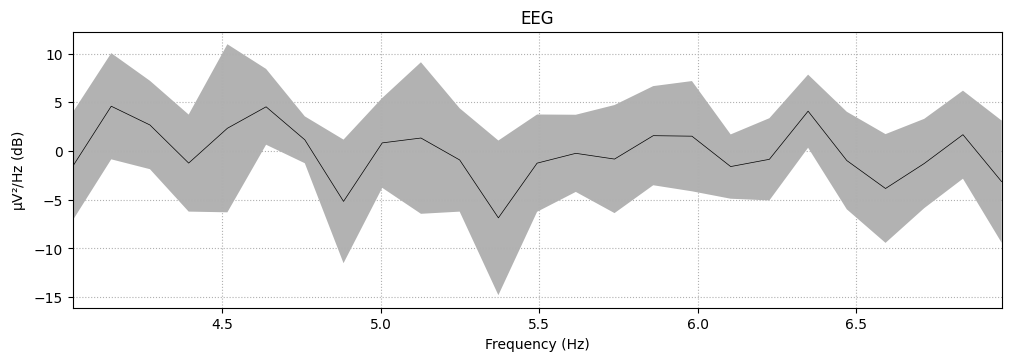

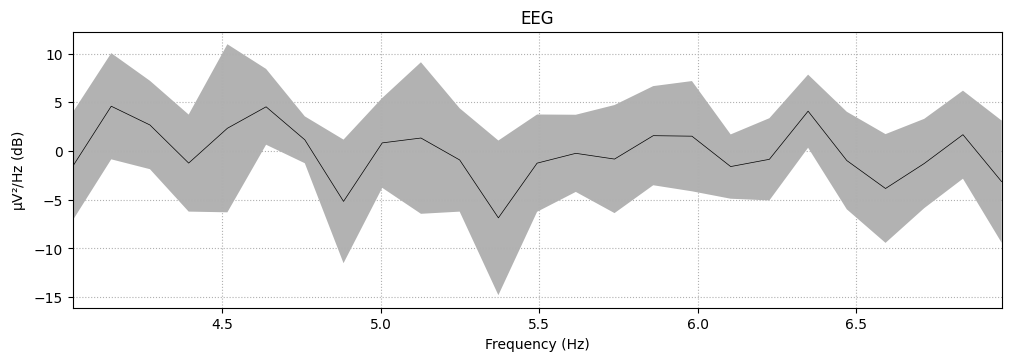

In [29]:
spectrum = rest[0].compute_psd(method='welch', fmin=4, fmax=7)
spectrum.plot(average=True)


In [43]:
print(spectrum.info)
a= (spectrum.get_data()*250)**(1/2)*10**6
a = a**2 / 250
#spectrum.get_data()
a

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 45.0 Hz
 meas_date: 2020-09-24 10:58:24 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>


array([[[1.36414834e+00, 9.13248501e-01, 1.92952311e-01, 2.26393404e-01,
         1.30725770e-01, 1.56571867e+00, 8.14288857e-01, 8.51046235e-01,
         1.65610542e+00, 1.35346539e+00, 3.78559805e-02, 6.51980401e-02,
         1.42176157e-01, 4.02000776e-01, 1.61660821e-01, 5.02365088e-01,
         2.27782472e-01, 1.20523187e+00, 7.05132521e-01, 2.16668993e+00,
         1.47637122e+00, 1.16169733e-01, 9.54312658e-01, 1.80269866e+00,
         2.06906641e-01],
        [1.62291396e-01, 6.53643523e-01, 1.10995946e+00, 1.19646851e-01,
         3.68556487e-01, 2.80000232e+00, 1.58043285e+00, 1.88867263e-01,
         1.07239406e+00, 5.74529500e-01, 4.49725809e-01, 1.39843819e-01,
         1.35274787e-01, 4.86951426e-01, 5.16021565e-01, 3.18160559e-01,
         2.09190291e-01, 2.14015791e-01, 3.82490465e-01, 1.68508162e+00,
         7.43394400e-01, 7.67635348e-02, 4.35928598e-01, 1.07534562e+00,
         4.33755575e-01],
        [4.12875700e-01, 2.81687299e+00, 2.38285014e+00, 4.10849899e-01,

In [30]:
print(rest[0].info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG, 1 ECG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 45.0 Hz
 meas_date: 2020-09-24 10:58:24 UTC
 nchan: 20
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>


In [25]:
print(np.mean(psds[0],axis=0))
print(freqs)
print(psds[0].mean(0))

[2.74638828e-10 3.55454422e-10 3.31215061e-10]
[4.8828125 5.859375  6.8359375]
[2.74638828e-10 3.55454422e-10 3.31215061e-10]


ValueError: x and y must have same first dimension, but have shapes (3,) and (20, 3)

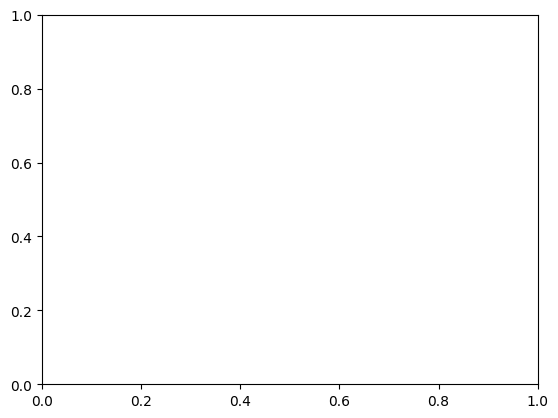

In [23]:
plt.plot(freqs, psds.mean(0))

In [2]:
data_set1 = pd.read_csv('CSV_feature_files/p2_features.csv')
data_set2 = pd.read_csv('CSV_feature_files/p3_features.csv')
data_set3 = pd.read_csv('CSV_feature_files/p4_features.csv')
data_set4 = pd.read_csv('CSV_feature_files/p5_features.csv')
data_set = pd.concat([data_set1, data_set2, data_set3, data_set4], ignore_index=True)
data_set

,Unnamed: 0,Event,PSD Delta,PSD Delta_N,PSD Theta,PSD Theta_N,PSD Alpha,PSD Alpha_N,PSD Beta,PSD Beta_N,...,Mean HR,Std HR,Min HR,Max HR,VLF,LF,HF,VHF,Total power,LF/HF
0,0,R,-97.793047,0.207402,-96.873757,0.188400,-100.156697,0.133177,-101.412066,0.183409,...,75.944197,0.282565,75.376884,76.530612,NaN,NaN,1.275646,NaN,1.275646,NaN
1,1,R,-94.559157,0.282317,-98.254960,0.153068,-100.240293,0.090236,-101.933130,0.127643,...,74.229925,0.371484,73.529412,75.000000,NaN,NaN,1.988132,NaN,1.988132,NaN
2,2,R,-88.108893,0.167719,-100.389486,0.028663,-101.660471,0.019506,-107.446959,0.008805,...,73.039593,0.598821,71.770335,73.891626,NaN,NaN,1.199232,NaN,1.199232,NaN
3,0,M,-89.821656,0.375439,-98.917531,0.117006,-101.226153,0.059422,-103.154082,0.040399,...,74.942685,3.921150,60.975610,84.745763,NaN,NaN,600.217776,NaN,600.217776,NaN
4,1,M,-89.004300,0.382677,-95.484375,0.173670,-97.599618,0.081744,-102.696369,0.079055,...,74.669935,0.506060,73.529412,75.757576,NaN,NaN,1.495898,NaN,1.495898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5,F,-86.846077,0.545554,-99.451657,0.059819,-108.664569,0.017709,-108.727897,0.016209,...,75.953290,0.979984,73.891626,77.319588,NaN,NaN,1.015045,NaN,1.015045,NaN
88,6,F,-91.969839,0.444513,-95.924133,0.229644,-105.566358,0.025061,-110.691177,0.012559,...,74.042285,0.558814,72.815534,75.000000,NaN,NaN,2.952923,NaN,2.952923,NaN
89,7,F,-84.484043,0.248948,-98.533987,0.062962,-104.963710,0.018081,-108.903726,0.009202,...,73.912609,0.997025,72.115385,75.757576,NaN,NaN,3.591517,NaN,3.591517,NaN
90,8,F,-89.357914,0.356761,-96.559436,0.172084,-110.677834,0.024901,-109.517087,0.026365,...,72.370168,1.749241,69.124424,75.000000,NaN,NaN,NaN,NaN,0.000000,NaN


In [27]:
markers_list = ['PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR'] # 
#markers_list = [ 'PSD Delta_N',  'PSD Theta_N', 'PSD Alpha_N', 'PSD Beta_N', 'PSD Gamma_N', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR'] # 

print(len(markers_list))
x = data_set.loc[:, markers_list].values
x = StandardScaler().fit_transform(x) # normalizing the features


23


In [28]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalised_feat = pd.DataFrame(x,columns=feat_cols)
normalised_feat

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22
0,-2.142038,-1.733203,-0.259414,0.911743,0.447328,2.406401,0.405336,3.778843,0.480414,1.882420,...,1.042158,-1.079780,3.061793,-1.151646,0.147774,-0.684306,-0.294931,-0.841402,-0.138387,-0.464283
1,-1.533354,-0.814177,-0.716607,0.307948,0.421086,1.032333,0.284782,2.263130,0.027771,0.194468,...,0.523415,-1.053507,0.395195,-1.242225,0.283014,-0.643052,-0.404387,-0.785148,-0.247545,-0.567282
2,-0.319285,-2.220023,-1.423159,-1.818023,-0.024746,-1.230917,-0.990905,-0.966858,-0.468652,-0.546832,...,-1.022182,-0.930776,-0.897687,0.114476,0.381371,-0.542552,-0.480390,-0.641324,-0.351481,-0.641868
3,-0.641661,0.328196,-0.935925,-0.308314,0.111598,0.046349,0.002301,-0.108147,-0.174012,-0.158821,...,-0.099529,-0.689146,-0.851059,-1.300999,0.232080,4.083297,-0.358878,1.460535,-0.989291,0.088538
4,-0.487818,0.416984,0.200487,0.660009,1.250064,0.760625,0.108198,0.942526,0.103598,0.281356,...,0.552924,-0.725389,-0.002474,-0.875062,0.249741,-0.548057,-0.376293,-0.700009,-0.247545,-0.516303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.081597,2.415092,-1.112727,-1.285589,-2.223519,-1.288432,-1.287264,-0.765618,-1.265608,-0.566974,...,-0.840638,0.113419,-0.239283,0.452972,0.145237,-0.407413,-0.294350,-0.400183,-0.226144,-0.411190
88,-1.045993,1.175570,0.054922,1.616561,-1.250908,-1.053173,-1.741491,-0.864821,-1.231751,-0.582571,...,-1.213379,-0.314337,0.252489,-0.241864,0.298821,-0.547279,-0.416368,-0.666634,-0.289725,-0.567282
89,0.362985,-1.223534,-0.808968,-1.231873,-1.061721,-1.276535,-1.327944,-0.956072,-1.244520,-0.594982,...,-0.937756,0.758901,-0.868711,0.467232,0.311116,-0.365438,-0.424648,-0.389402,-0.331094,-0.516303
90,-0.554376,0.099064,-0.155370,0.632912,-2.855536,-1.058301,-1.469852,-0.489586,-1.328365,-0.510711,...,-0.654244,-0.317688,-0.411316,0.172699,0.437575,0.021021,-0.523133,0.086485,-0.507815,-0.567282


In [39]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [40]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc1 = [round(x,3) for x in pc1] 
pc2 = [round(x,3) for x in pc2]
print(pc1)
print(pc2) 
sort1 = np.argsort(abs(np.array(pc1)))[::-1]
sort2 = np.argsort(abs(np.array(pc2)))[::-1]
print([markers_list[i] for i in sort1])
print([markers_list[i] for i in sort2])

[0.179, 0.073, 0.119, 0.024, 0.228, 0.174, 0.323, 0.278, 0.312, 0.284, 0.282, 0.27, 0.309, 0.287, 0.145, 0.012, 0.061, -0.169, 0.031, 0.197, 0.068, 0.173, 0.219]
[0.063, 0.086, 0.142, 0.097, 0.17, 0.069, 0.11, -0.005, 0.137, -0.002, 0.049, -0.032, 0.067, 0.121, 0.09, -0.005, 0.04, 0.389, 0.408, -0.368, 0.382, -0.403, -0.317]
['PSD Beta', 'PSD Gamma', 'PSD Sef90', 'PSD Sef95', 'PSD Gamma_N', 'PSD SE', 'PSD Beta_N', 'PSD MSF', 'PSD Alpha', 'Max HR', 'Mean HR', 'PSD Delta', 'PSD Alpha_N', 'Min HR', 'Mean RR', 'PE', 'PSD Theta', 'PSD Delta_N', 'Std HR', 'Kolmogorov', 'Std RR', 'PSD Theta_N', 'wSMI']
['Std RR', 'Min HR', 'Mean RR', 'Std HR', 'Mean HR', 'Max HR', 'PSD Alpha', 'PSD Theta', 'PSD Gamma', 'PSD Sef95', 'PSD Beta', 'PSD Theta_N', 'PE', 'PSD Delta_N', 'PSD Alpha_N', 'PSD Sef90', 'PSD Delta', 'PSD SE', 'Kolmogorov', 'PSD MSF', 'PSD Beta_N', 'wSMI', 'PSD Gamma_N']


In [41]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [42]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.33819621 0.18967542]


<Figure size 640x480 with 0 Axes>

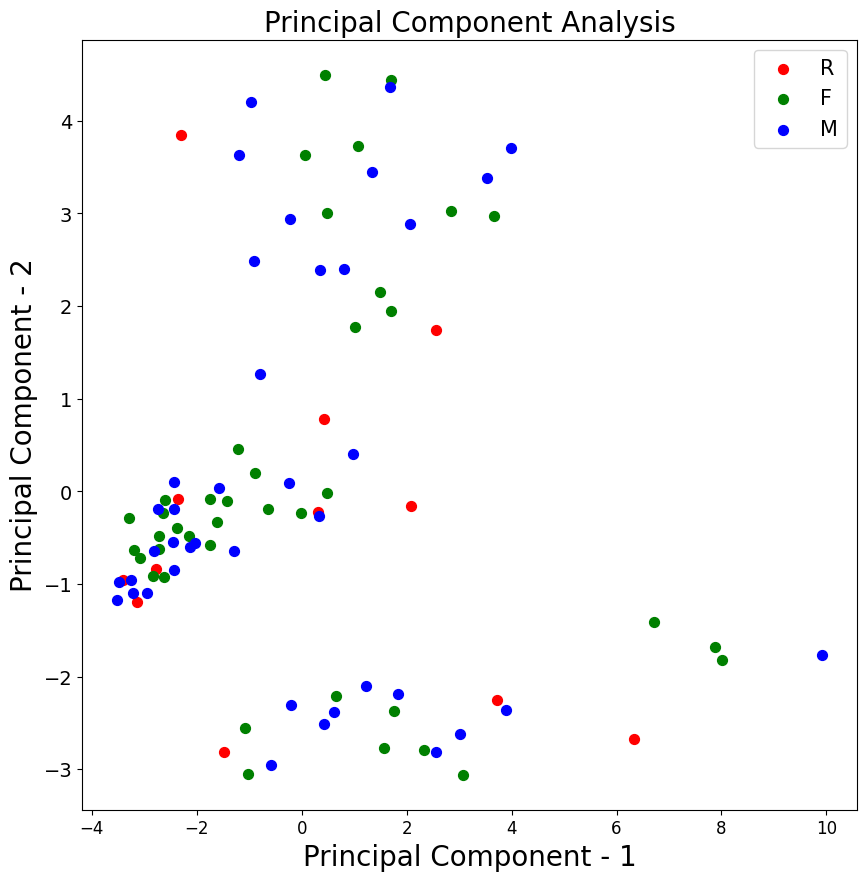

In [43]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['R', 'F', 'M']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data_set['Event'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
